In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_files

In [4]:
config = get_config.read_yaml()
tickers = config['data'][config['data']['selected_tickers']]
ticker = tickers[0]
ticker

'ADANIENT.NS'

In [5]:
data = read_files.read_raw_training_data(ticker)
data

Reading Raw Training data: ADANIENT !
Successfully read: ADANIENT !


,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %
Date,,,,,,,,,,
2014-12-16,63.500011,64.271144,62.700045,63.435146,7197622,-0.008926,0.991114,0.991114,0.000000,0.000000
2014-12-17,63.125256,63.932433,61.546946,63.146880,10603088,-0.005919,0.985265,0.991114,0.005849,0.590167
2014-12-18,64.242325,64.847710,63.370296,63.853153,6457188,0.017541,1.002700,1.002700,0.000000,0.000000
2014-12-19,65.179222,66.281878,64.508979,64.508979,8433276,0.014478,1.017323,1.017323,0.000000,0.000000
2014-12-22,65.654884,66.231435,65.373812,65.373812,5039463,0.007271,1.024747,1.024747,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783447,2844.997575,2788.848743,2813.376355,1513956,0.003067,43.792917,64.920511,21.127594,32.543789
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683321,64.920511,20.237190,31.172259
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338701,64.920511,20.581810,31.703094


In [6]:
# define a function to plot various datafields
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

In [7]:
# Handling NaN values in the dataframe (WIP)
data = data[data.index >= config['data']['begin_train_date']].copy()
data = data.ffill()
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %
Date,,,,,,,,,,
2015-07-01,46.963169,47.654936,46.655716,46.783822,8195635,0.008767,0.733005,1.787965,1.054959,59.003366
2015-07-02,46.783821,47.654935,46.322646,47.398723,9383950,-0.003826,0.730206,1.787965,1.057759,59.159928
2015-07-03,46.630093,47.834276,46.373884,46.937545,8627185,-0.003291,0.727807,1.787965,1.060158,59.294126
2015-07-06,46.501999,46.937554,45.938338,46.117685,8015491,-0.002751,0.725807,1.787965,1.062157,59.405946
2015-07-07,47.168137,47.911145,46.143300,46.835063,8715245,0.014223,0.736204,1.787965,1.051760,58.824439
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783447,2844.997575,2788.848743,2813.376355,1513956,0.003067,43.792917,64.920511,21.127594,32.543789
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683321,64.920511,20.237190,31.172259
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338701,64.920511,20.581810,31.703094


In [8]:
# Handling NaN values in the dataframe (WIP)
data = data[data.index >= config['data']['begin_train_date']].copy()
data = data.ffill()
data

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %
Date,,,,,,,,,,
2015-07-01,46.963169,47.654936,46.655716,46.783822,8195635,0.008767,0.733005,1.787965,1.054959,59.003366
2015-07-02,46.783821,47.654935,46.322646,47.398723,9383950,-0.003826,0.730206,1.787965,1.057759,59.159928
2015-07-03,46.630093,47.834276,46.373884,46.937545,8627185,-0.003291,0.727807,1.787965,1.060158,59.294126
2015-07-06,46.501999,46.937554,45.938338,46.117685,8015491,-0.002751,0.725807,1.787965,1.062157,59.405946
2015-07-07,47.168137,47.911145,46.143300,46.835063,8715245,0.014223,0.736204,1.787965,1.051760,58.824439
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2805.783447,2844.997575,2788.848743,2813.376355,1513956,0.003067,43.792917,64.920511,21.127594,32.543789
2023-12-26,2862.831055,2891.105239,2797.540928,2814.425385,2048484,0.020128,44.683321,64.920511,20.237190,31.172259
2023-12-27,2840.751465,2892.154394,2831.010376,2878.067183,1698325,-0.007742,44.338701,64.920511,20.581810,31.703094


In [9]:
scaler = MinMaxScaler()
scaler.fit(data)
data_scaled = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
data_scaled

,Close,High,Low,Open,Volume,Returns,B&H Returns,B&H Max,B&H Drawdown,B&H Drawdown %
Date,,,,,,,,,,
2015-07-01,0.003866,0.003687,0.003956,0.003782,0.046776,0.593228,0.003866,0.0,0.022776,0.808978
2015-07-02,0.003822,0.003687,0.003873,0.003930,0.053770,0.571256,0.003822,0.0,0.022837,0.811124
2015-07-03,0.003785,0.003730,0.003886,0.003819,0.049316,0.572189,0.003785,0.0,0.022888,0.812964
2015-07-06,0.003754,0.003514,0.003778,0.003621,0.045716,0.573132,0.003754,0.0,0.022932,0.814497
2015-07-07,0.003916,0.003748,0.003829,0.003794,0.049835,0.602747,0.003916,0.0,0.022707,0.806524
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.672118,0.677464,0.684411,0.672369,0.007450,0.583283,0.672118,1.0,0.456137,0.446198
2023-12-26,0.685936,0.688570,0.686568,0.672623,0.010596,0.613050,0.685936,1.0,0.436913,0.427394
2023-12-27,0.680588,0.688822,0.694873,0.688003,0.008535,0.564423,0.680588,1.0,0.444353,0.434672


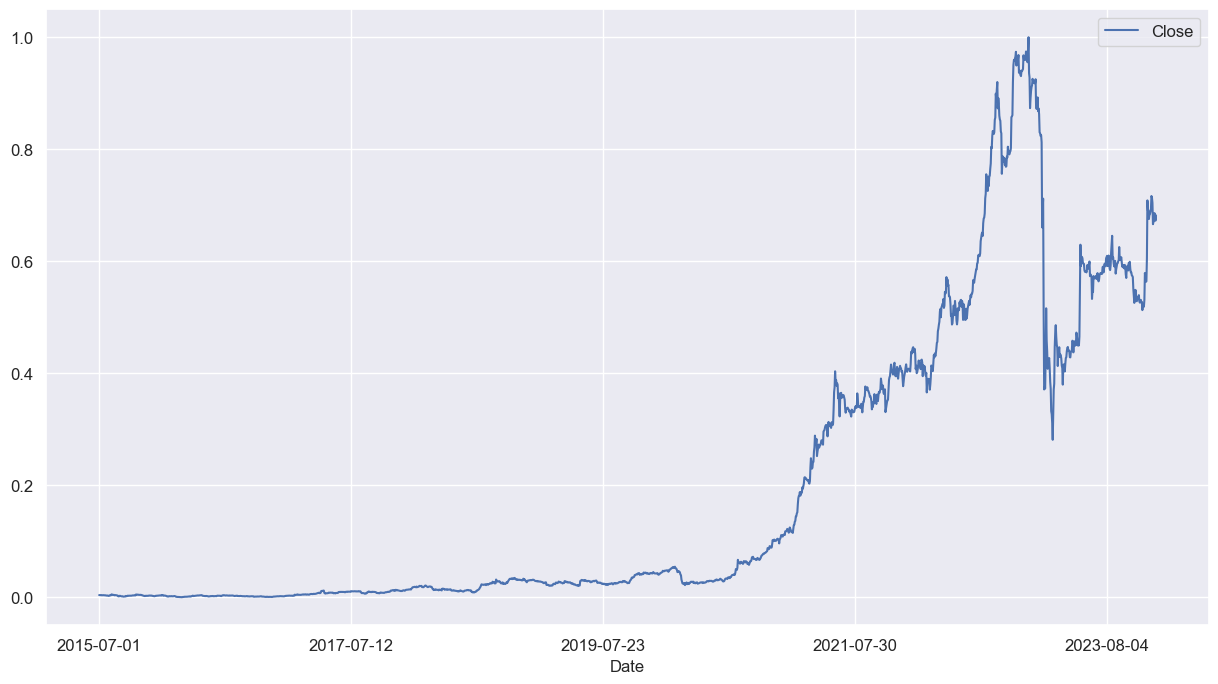

In [10]:
plot_df(data_scaled['Close'])